<a href="https://colab.research.google.com/github/2303a51863/NLP/blob/main/DISASTER_TWEETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT-DISASTER TWEETS(01-09-2025)

H.NO:2303a51863

Batch-13

In [4]:
import pandas as pd
import numpy as np
import re
import string
df=pd.read_csv("/content/sample_data/tweets.csv")
print(df)

          id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  
0      Communal violence in Bhainsa, Telangana. "Ston...       1  
1      Telangana: Section 144 has been imposed in Bha...       1  
2      Arsonist sets cars ablaze at dealership https:...       1  
3      Arsonist sets cars ablaze at dealership https:...       1  
4      "Lord Jesus, your love brings freedom and pard...       0

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from nltk.tokenize.punkt import PunktTokenizer # Import PunktTokenizer

def preprocess_text(text):
  text=str(text).lower()
  text = text.translate(str.maketrans('','',string.punctuation))
  text = re.sub(r'[^a-z0-9\s]', '', text)

  tokenizer = PunktTokenizer()
  tokens=tokenizer.tokenize(text)
  stop_words=set(stopwords.words("english"))
  tokens=[word for word in tokens if word not in stop_words]
  return " ".join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line to download the missing resource
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
df['text'] = df['text'].astype(str).apply(preprocess_text)
print(df['text'].head())

0    communal violence bhainsa telangana stones pel...
1    telangana section 144 imposed bhainsa january ...
2    arsonist sets cars ablaze dealership httpstcog...
3    arsonist sets cars ablaze dealership httpstco0...
4    lord jesus love brings freedom pardon fill hol...
Name: text, dtype: object


In [14]:
X = df["text"]
y = df["target"]
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\nModel: {model.__class__.__name__}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    return acc, prec, rec, f1

results = {}


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(max_iter=1000)
results["Logistic Regression"] = evaluate_model(log_reg, X_train, X_test, y_train, y_test)
svm = SVC(kernel="linear")
results["SVM"] = evaluate_model(svm, X_train, X_test, y_train, y_test)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
results["Random Forest"] = evaluate_model(rf, X_train, X_test, y_train, y_test)
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"]).T
print("\n=== Model Comparison ===")
print(results_df)


Model: LogisticRegression
Accuracy : 0.8588
Precision: 0.8228
Recall   : 0.3073
F1-score : 0.4475

Model: SVC
Accuracy : 0.8760
Precision: 0.7854
Recall   : 0.4586
F1-score : 0.5791

Model: RandomForestClassifier
Accuracy : 0.8777
Precision: 0.7675
Recall   : 0.4917
F1-score : 0.5994

=== Model Comparison ===
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.858839   0.822785  0.307329  0.447504
SVM                  0.875989   0.785425  0.458629  0.579104
Random Forest        0.877748   0.767528  0.491726  0.599424


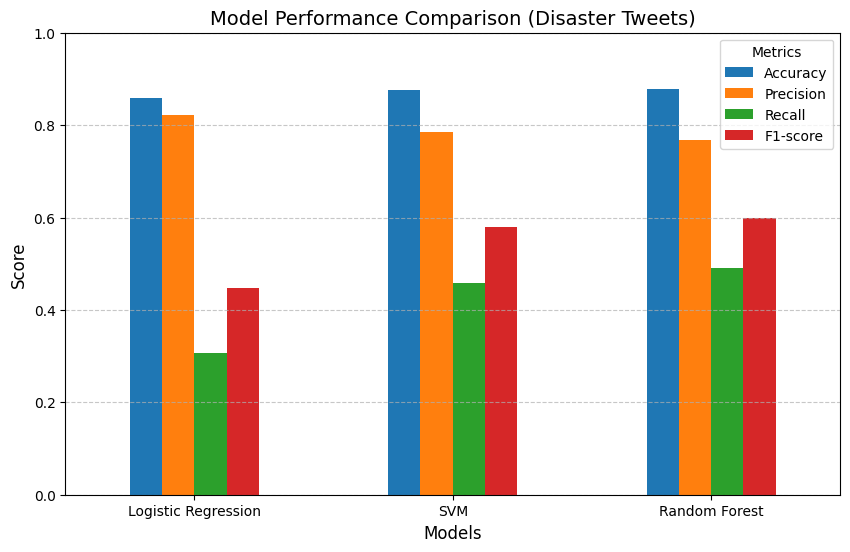

In [17]:
import matplotlib.pyplot as plt
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
results_df = pd.DataFrame(results, index=metrics).T
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison (Disaster Tweets)", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


(08-09-2025)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,Conv1D,GlobalMaxPooling1D,LSTM,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
mlp= Sequential([Dense(128, activation="relu",
                    input_shape=(X_train.shape[1],)),
              Dropout(0,3),Dense(64,activation="relu"),
              Dense(1,activation="sigmoid")
              ])
mlp.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
mlp.fit(X_train.toarray(),y_train,validation_data=(X_test.toarray(),y_test),epochs=5,batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8092 - loss: 0.5235 - val_accuracy: 0.8584 - val_loss: 0.3333
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9039 - loss: 0.2350 - val_accuracy: 0.8804 - val_loss: 0.3236
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9578 - loss: 0.1211 - val_accuracy: 0.8734 - val_loss: 0.3773
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9822 - loss: 0.0602 - val_accuracy: 0.8681 - val_loss: 0.4738
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9926 - loss: 0.0293 - val_accuracy: 0.8738 - val_loss: 0.5668


CNN

In [22]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df["text"])
X_seq=tokenizer.texts_to_sequences(df["text"])
X_pad=pad_sequences(X_seq,maxlen=100)
X_train_seq,X_test_seq,y_train,y_test=train_test_split(X_pad,df["target"],test_size=0.2,random_state=42)
vocab_size=len(tokenizer.word_index)+1

In [26]:
cnn=Sequential([
    Embedding(input_dim=5000,output_dim=128),
    Conv1D(128,3,activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64,activation="relu"),
    Dropout(0.5),
    Dense(1,activation="sigmoid")
])
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
cnn.fit(X_train.toarray(),y_train,validation_data=(X_test.toarray(),y_test),epochs=5,batch_size=64)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


143/143 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.8105 - loss: 0.5098 - val_accuracy: 0.8857 - val_loss: 0.2989
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9148 - loss: 0.2261 - val_accuracy: 0.8953 - val_loss: 0.2824
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9725 - loss: 0.0958 - val_accuracy: 0.8896 - val_loss: 0.3289
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step - accuracy: 0.9905 - loss: 0.0390 - val_accuracy: 0.8927 - val_loss: 0.4195
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.9957 - loss: 0.0236 - val_accuracy: 0.8914 - val_loss: 0.4658


LSTM

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,Conv1D,GlobalMaxPooling1D,LSTM,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lstm=Sequential([
    Embedding(vocab_size,128,input_length=100),
    Bidirectional(LSTM(64,return_sequences=False)),
    Dropout(0.3),
    Dense(1,activation="sigmoid")
])
lstm.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
lstm.fit(X_train_seq,y_train,validation_data=(X_test_seq,y_test),epochs=5,batch_size=64)

Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - accuracy: 0.8063 - loss: 0.4696 - val_accuracy: 0.8984 - val_loss: 0.2636
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 39s 271ms/step - accuracy: 0.9328 - loss: 0.1873 - val_accuracy: 0.9028 - val_loss: 0.2589
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 268ms/step - accuracy: 0.9650 - loss: 0.1033 - val_accuracy: 0.8839 - val_loss: 0.3101
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 264ms/step - accuracy: 0.9817 - loss: 0.0571 - val_accuracy: 0.8848 - val_loss: 0.3446
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 41s 291ms/step - accuracy: 0.9878 - loss: 0.0373 - val_accuracy: 0.8997 - val_loss: 0.4029


In [28]:
cnn_loss, cnn_accuracy = cnn.evaluate(X_test_seq, y_test, verbose=0)
cnn_y_pred = (cnn.predict(X_test_seq) > 0.5).astype("int32")
cnn_precision = precision_score(y_test, cnn_y_pred, zero_division=0)
cnn_recall = recall_score(y_test, cnn_y_pred, zero_division=0)
cnn_f1 = f1_score(y_test, cnn_y_pred, zero_division=0)

results["CNN"] = (cnn_accuracy, cnn_precision, cnn_recall, cnn_f1)

lstm_loss, lstm_accuracy = lstm.evaluate(X_test_seq, y_test, verbose=0)
lstm_y_pred = (lstm.predict(X_test_seq) > 0.5).astype("int32")
lstm_precision = precision_score(y_test, lstm_y_pred, zero_division=0)
lstm_recall = recall_score(y_test, lstm_y_pred, zero_division=0)
lstm_f1 = f1_score(y_test, lstm_y_pred, zero_division=0)

results["LSTM"] = (lstm_accuracy, lstm_precision, lstm_recall, lstm_f1)

results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score"]).T
print("\n=== Model Comparison ===")
print(results_df)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step

=== Model Comparison ===
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.858839   0.822785  0.307329  0.447504
SVM                  0.875989   0.785425  0.458629  0.579104
Random Forest        0.877748   0.767528  0.491726  0.599424
CNN                  0.891381   0.721068  0.613636  0.663029
LSTM                 0.899736   0.778146  0.593434  0.673352


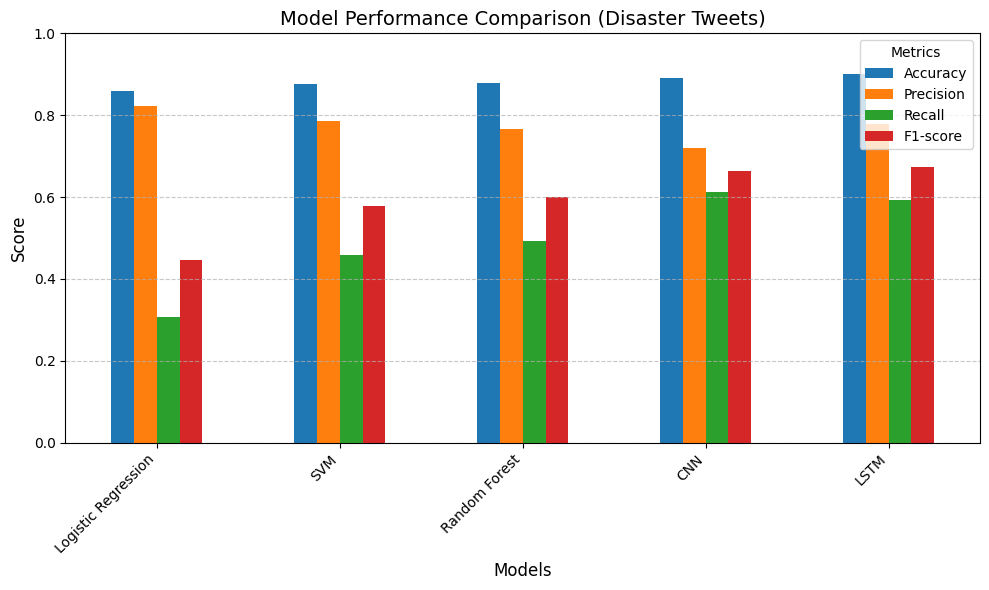

In [29]:
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison (Disaster Tweets)", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metrics")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()